we have explored two different families of
generative models that have both involved latent variables
—variational autoencoders (VAEs) and generative
adversarial networks (GANs). In both cases, a new variable
is introduced with a distribution that is easy to sample from
and the model learns how to decode this variable back into
the original domain.

We will now turn our attention to autoregressive models—a
family of models that simplify the generative modeling
problem by treating it as a sequential process.
Autoregressive models condition predictions on previous
values in the sequence, rather than on a latent random
variable. Therefore, they attempt to explicitly model the
data-generating distribution rather than an approximation
of it (as in the case of VAEs).

#### THE LITERARY SOCIETY FOR TROUBLESOME MISCREANTS
Edward Sopp hated his job as a prison warden. He spent
his days watching over the prisoners and had no time to
follow his true passion of writing short stories. He was
running low on inspiration and needed to find a way to
generate new content.
One day, he came up with a brilliant idea that would
allow him to produce new works of fiction in his style,
while also keeping the inmates occupied—he would get
the inmates to collectively write the stories for him! He
branded the new society the Literary Society for
Troublesome Miscreants, or LSTM

The prison is particularly strange because it only
consists of one large cell, containing 256 prisoners.
Each prisoner has an opinion on how Edward’s current
story should continue. Every day, Edward posts the
latest word from his novel into the cell, and it is the job of the inmates to individually update their opinions on

the current state of the story, based on the new word
and the opinions of the inmates from the previous day.
Each prisoner uses a specific thought process to update
their own opinion, which involves balancing information
from the new incoming word and other prisoners’
opinions with their own prior beliefs. First, they decide
how much of yesterday’s opinion they wish to forget,
taking into account the information from the new word
and the opinions of other prisoners in the cell. They also
use this information to form new thoughts and decide to
what extent they want to mix these into the old beliefs
that they have chosen to carry forward from the
previous day. This then forms the prisoner’s new opinion
for the day.

However, the prisoners are secretive and don’t always
tell their fellow inmates all of their opinions. They each
also use the latest chosen word and the opinions of the
other inmates to decide how much of their opinion they
wish to disclose.

When Edward wants the cell to generate the next word
in the sequence, the prisoners each tell their disclosable
opinions to the guard at the door, who combines this
information to ultimately decide on the next word to be
appended to the end of the novel. This new word is then
fed back into the cell, and the process continues until
the full story is completed.

To train the inmates and the guard, Edward feeds short
sequences of words that he has written previously into
the cell and monitors whether the inmates’ chosen next
word is correct. He updates them on their accuracy, and
gradually they begin to learn how to write stories in his
own unique style.

After many iterations of this process, Edward finds that
the system has become quite accomplished at
generating realistic-looking text. Satisfied with the
results, he publishes a collection of the generated tales
in his new book, entitled E. Sopp’s Fables.


In [6]:
recipes_json = 'C:\\Users\\Whitebox\\Desktop\\envs_and_git_repos\\generative_models\\data\\recipes\\full_format_recipes.json'

In [7]:
import json 
with open(recipes_json) as json_data:
    recipe_data = json.load(json_data)

filtered_data = [
    'Recipe for ' + x['title']+ ' | ' + ' '.join(x['directions'])
    for x in recipe_data if 'title' in x and x['title'] is not None and 
                            'directions' in x and x['directions'] is not None
]


In [8]:
for recipe in filtered_data[:5]:
    print(recipe)

Recipe for Lentil, Apple, and Turkey Wrap  | 1. Place the stock, lentils, celery, carrot, thyme, and salt in a medium saucepan and bring to a boil. Reduce heat to low and simmer until the lentils are tender, about 30 minutes, depending on the lentils. (If they begin to dry out, add water as needed.) Remove and discard the thyme. Drain and transfer the mixture to a bowl; let cool. 2. Fold in the tomato, apple, lemon juice, and olive oil. Season with the pepper. 3. To assemble a wrap, place 1 lavash sheet on a clean work surface. Spread some of the lentil mixture on the end nearest you, leaving a 1-inch border. Top with several slices of turkey, then some of the lettuce. Roll up the lavash, slice crosswise, and serve. If using tortillas, spread the lentils in the center, top with the turkey and lettuce, and fold up the bottom, left side, and right side before rolling away from you.
Recipe for Boudin Blanc Terrine with Red Onion Confit  | Combine first 9 ingredients in heavy medium saucep

#### Working with Text data
- Text data is composed of discrete chunks (either
characters or words), whereas pixels in an image are
points in a continuous color spectrum. We can easily
make a green pixel more blue, but it is not obvious how
we should go about making the word cat more like the
word dog, for example. This means we can easily apply
backpropagation to image data, as we can calculate the
gradient of our loss function with respect to individual
pixels to establish the direction in which pixel colors
should be changed to minimize the loss. With discrete
text data, we can’t obviously apply backpropagation in
the same way, so we need to find a way around this
problem.
- Text data has a time dimension but no spatial
dimension, whereas image data has two spatial
dimensions but no time dimension. The order of words
is highly important in text data and words wouldn’t
make sense in reverse, whereas images can usually be
flipped without affecting the content. Furthermore,
there are often long-term sequential dependencies
between words that need to be captured by the model:
for example, the answer to a question or carrying
forward the context of a pronoun. With image data, all
pixels can be processed simultaneously 
- Text data is highly sensitive to small changes in the
individual units (words or characters). Image data is
generally less sensitive to changes in individual pixel
units—a picture of a house would still be recognizable
as a house even if some pixels were altered—but with
text data, changing even a few words can drastically
alter the meaning of the passage, or make it
nonsensical. This makes it very difficult to train a model
to generate coherent text, as every word is vital to the
overall meaning of the passage.
- Text data has a rules-based grammatical structure,
whereas image data doesn’t follow set rules about how
the pixel values should be assigned. For example, it
wouldn’t make grammatical sense in any context to
write “The cat sat on the having.” There are also
semantic rules that are extremely difficult to model; it
wouldn’t make sense to say “I am in the beach,” even
though grammatically, there is nothing wrong with this
statement.

##### Tokenization
How you tokenize your text will depend on what you are
trying to achieve with your text generation model. There
are pros and cons to using both word and character tokens,
and your choice will affect how you need to clean the text
prior to modeling and the output from your model.

If you use word tokens:
- All text can be converted to lowercase, to ensure
capitalized words at the start of sentences are
tokenized the same way as the same words appearing
in the middle of a sentence. In some cases, however,
this may not be desirable; for example, some proper
nouns, such as names or places, may benefit from
remaining capitalized so that they are tokenized
independently.
- The text vocabulary (the set of distinct words in the
training set) may be very large, with some words
appearing very sparsely or perhaps only once. It may
be wise to replace sparse words with a token for
unknown word, rather than including them as separate
tokens, to reduce the number of weights the neural
network needs to learn.
- Words can be stemmed, meaning that they are reduced
to their simplest form, so that different tenses of a verb
remained tokenized together. For example, browse,
browsing, browses, and browsed would all be stemmed
to brows.
- You will need to either tokenize the punctuation, or
remove it altogether.
Using word tokenization means that the model will
never be able to predict words outside of the training
vocabulary.

If you use character tokens:
- The model may generate sequences of characters that
form new words outside of the training vocabulary—
this may be desirable in some contexts, but not in
others.
- Capital letters can either be converted to their
lowercase counterparts, or remain as separate tokens.
- The vocabulary is usually much smaller when using
character tokenization. This is beneficial for model
training speed as there are fewer weights to learn in
the final output layer.



In [9]:
import re, string
from tensorflow.keras import layers, models, utils, metrics, losses
import tensorflow as tf

In [10]:
def pad_punctuation(s):
    s = re.sub(f'([{string.punctuation}])', r' \1 ',s)
    s = re.sub(' + ',' ',s)
    if '0xc2' in s:
        print(s)
    return s
    # return tf.strings.unicode_decode(s,input_encoding='UTF-8')


text_data = [pad_punctuation(x) for x in filtered_data]
text_ds = tf.data.Dataset.from_tensor_slices(text_data).batch(32).shuffle(1000) #Convert to Dataset
#Layer that Converts Text to integers
vectorize_layer = layers.TextVectorization(standardize='lower',
                                           max_tokens=10000,
                                           output_mode='int',
                                           output_sequence_length=200+1)
# learn vocabulary and conver to integers
vectorize_layer.adapt(text_ds)

In [11]:
vocab = vectorize_layer.get_vocabulary()

In [13]:
def prepare_inputs(text):
    text = tf.expand_dims(text,-1)
    tokenized_sentences = vectorize_layer(text)
    x = tokenized_sentences[:,:-1]
    y = tokenized_sentences[:,1:]
    return x,y

train_ds = text_ds.map(prepare_inputs)

In [19]:
lstm_input = layers.Input(shape=(None,),dtype='int32')
x = layers.Embedding(input_dim=10000,output_dim=100)(lstm_input)
x = layers.LSTM(128,return_sequences=True)(x)
lstm_output = layers.Dense(10000,activation='softmax')(x)

lstm_model = models.Model(lstm_input,lstm_output)
lstm_model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_2 (Embedding)     (None, None, 100)         1000000   
                                                                 
 lstm_2 (LSTM)               (None, None, 128)         117248    
                                                                 
 dense_2 (Dense)             (None, None, 10000)       1290000   
                                                                 
Total params: 2,407,248
Trainable params: 2,407,248
Non-trainable params: 0
_________________________________________________________________


#### Embedding Layer

An embedding layer is essentially a lookup table that
converts each integer token into a vector of length
embedding_size, as shown in Figure 5-2. The lookup
vectors are learned by the model as weights. Therefore, the
number of weights learned by this layer is equal to the size
of the vocabulary multiplied by the dimension of the
embedding vector (i.e., 10,000 × 100 = 1,000,000).


#### LSTM
To understand the LSTM layer, we must first look at how a
general recurrent layer works.
A recurrent layer has the special property of being able to
process sequential input data x1,⋯, xn. It consists of a cell
that updates its hidden state, ht, as each element of the
sequence xt is passed through it, one timestep at a time.

The hidden state is a vector with length equal to the
number of units in the cell—it can be thought of as the
cell’s current understanding of the sequence. At timestep t,
the cell uses the previous value of the hidden state, ht−1,
together with the data from the current timestep xt to
produce an updated hidden state vector, ht. This recurrent
process continues until the end of the sequence. Once the
sequence is finished, the layer outputs the final hidden
state of the cell, hn, which is then passed on to the next
layer of the network. 

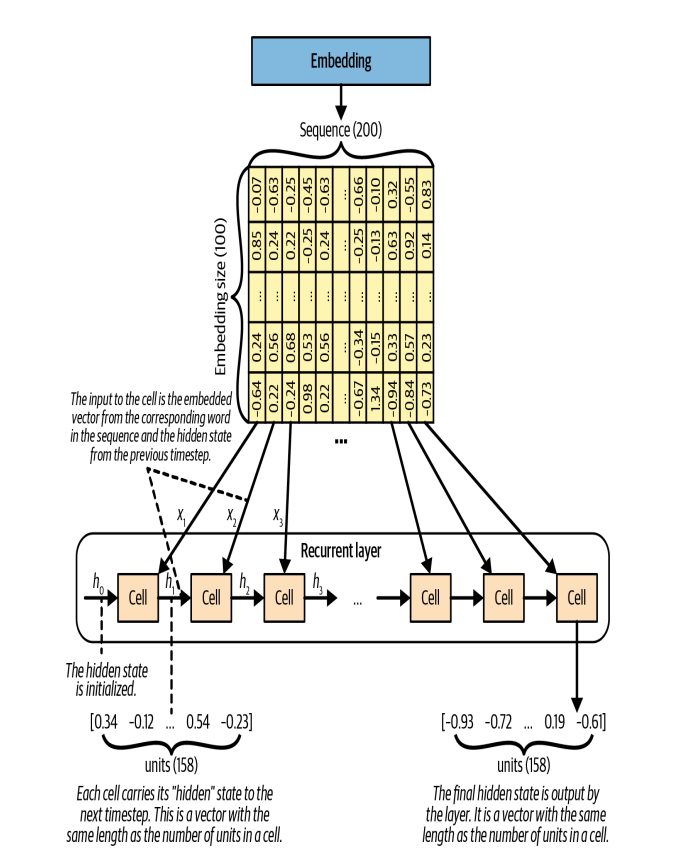

The job of the LSTM cell is to output a new hidden state, ht,
given its previous hidden state, ht−1, and the current word
embedding, xt. To recap, the length of ht is equal to the
number of units in the LSTM. This is a parameter that is set
when you define the layer and has nothing to do with the
length of the sequence

An LSTM cell maintains a cell state, Ct, which can be
thought of as the cell’s internal beliefs about the current
status of the sequence. This is distinct from the hidden
state, ht, which is ultimately output by the cell after the
final timestep. The cell state is the same length as the
hidden state (the number of units in the cell).

One Small note: the vectors h(t-1) and x(t) are not concatenated and donot need to be the same size
the matrices Wc, Wi and Wf are broken into two matrices to calculate separately

The hidden state is updated in six steps:
1. The hidden state of the previous timestep, ht−1, and the
current word embedding, xt, are concatenated and
passed through the forget gate. This gate is simply a
dense layer with weights matrix Wf, bias bf, and a
sigmoid activation function. The resulting vector, ft,
has length equal to the number of units in the cell and
contains values between 0 and 1 that determine how
much of the previous cell state, Ct−1, should be
retained
2. The concatenated vector is also passed through an
input gate that, like the forget gate, is a dense layer
with weights matrix Wi, bias bi, and a sigmoid
activation function. The output from this gate, it, has
length equal to the number of units in the cell and
contains values between 0 and 1 that determine how
much new information will be added to the previous
cell state, Ct−1.
3. The concatenated vector is passed through a dense
layer with weights matrix WC, bias bC, and a tanh
activation function to generate a vector C˜t that contains
the new information that the cell wants to consider
keeping. It also has length equal to the number of units
in the cell and contains values between –1 and 1.
4. ft and Ct−1 are multiplied element-wise and added to
the element-wise multiplication of it and C˜t. This
represents forgetting parts of the previous cell state
and then adding new relevant information to produce
the updated cell state, Ct.
5. The concatenated vector is passed through an output
gate: a dense layer with weights matrix Wo, bias bo, and
a sigmoid activation. The resulting vector, ot, has
length equal to the number of units in the cell and
stores values between 0 and 1 that determine how
much of the updated cell state, Ct, to output from the
cell.
6. ot is multiplied element-wise with the updated cell
state, Ct, after a tanh activation has been applied to
produce the new hidden state, ht

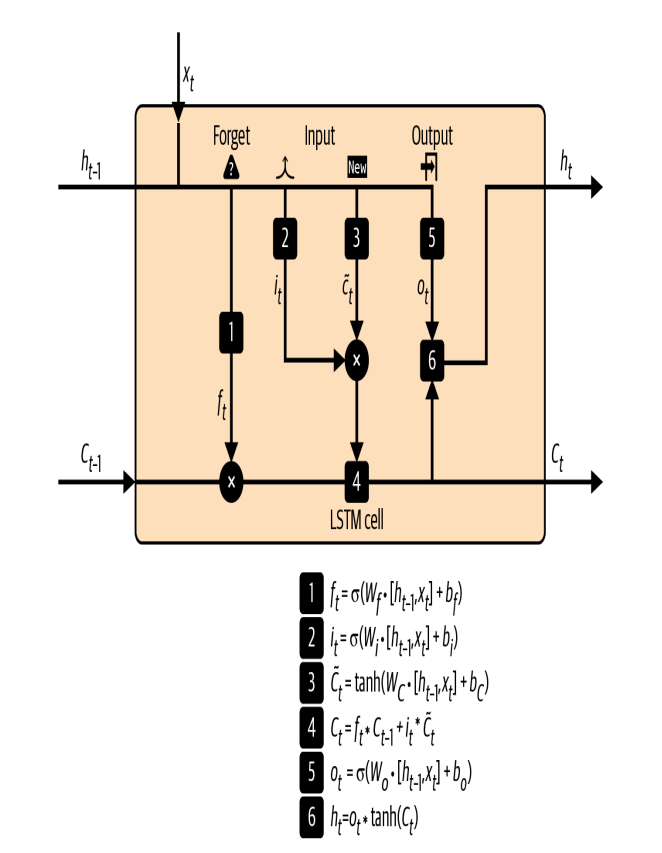

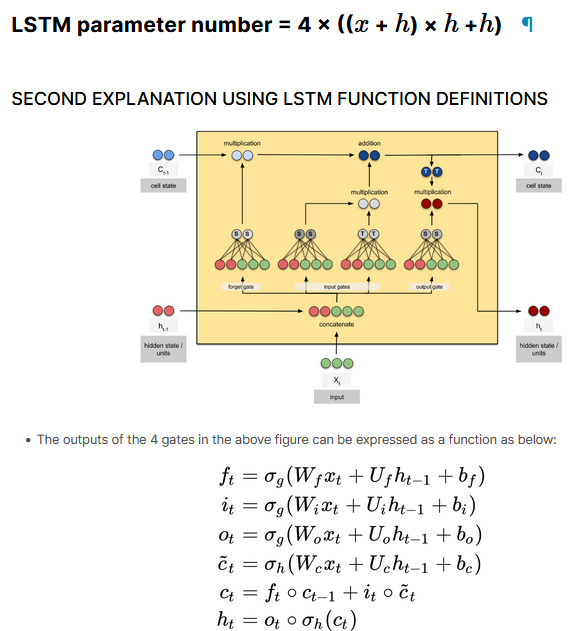

In [20]:
loss_fn =losses.SparseCategoricalCrossentropy()
lstm_model.compile('adam',loss_fn)
lstm_model.fit(train_ds,epochs=25)

Epoch 1/25
629/629 [==============================] - 38s 45ms/step - loss: 4.4710
Epoch 2/25
629/629 [==============================] - 29s 46ms/step - loss: 3.1306
Epoch 3/25
629/629 [==============================] - 29s 45ms/step - loss: 2.5198
Epoch 4/25
629/629 [==============================] - 29s 45ms/step - loss: 2.2542
Epoch 5/25
629/629 [==============================] - 27s 44ms/step - loss: 2.0950
Epoch 6/25
629/629 [==============================] - 28s 45ms/step - loss: 1.9898
Epoch 7/25
629/629 [==============================] - 28s 44ms/step - loss: 1.9129
Epoch 8/25
119/629 [====>.........................] - ETA: 21s - loss: 1.8669